In [ ]:
from IPython.display import display, HTML
import html
def display_variables(variables):
    """
    Used for printing variables(Referred in DFPython 3 notebook)
    Args:
    - variables (dict): A dictionary containing variable names as keys and their corresponding values.
    """
    html_template = """
    <style>.jp-RenderedHTMLCommon tbody tr:nth-child(even) {{ background: none; }}</style>
    <div style='opacity:80%;font-size:12px;padding-left: 6px'><br>DFPython 3 referred variables</div>
    <table>{}</table>"""
    
    row_template = "<tr><td style='color: #bf5b3d;text-align:left;vertical-align:top;'>{}</td><td style='text-align:left'> {}</td></tr>"
    rows = [row_template.format(name+':', value._repr_html_()) if hasattr(value, '_repr_html_') else row_template.format(name+':', html.escape(str(value))) for name, value in variables.items()]
    output_html = html_template.format("\n".join(rows))
    output_html = f"<div style='pointer-events: none;'>{output_html}</div>"
    display(HTML(output_html))

# Recognizing hand-written digits
 * Orignial URL: http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
 * Author: Gael Varoquaux (gael dot varoquaux at normalesup dot org)
 * License: BSD 3 clause
 * Dataflow Notebook Adaptation: Colin Brown, David Koop

In [1608800275]:
import matplotlib.pyplot as plt_5fe45813
from sklearn import datasets as datasets_5fe45813, svm as svm_5fe45813, metrics as metrics_5fe45813
import pandas as pd_5fe45813
display_variables({ "datasets_5fe45813": datasets_5fe45813,"svm_5fe45813": svm_5fe45813,"metrics_5fe45813": metrics_5fe45813,"plt_5fe45813": plt_5fe45813,"pd_5fe45813": pd_5fe45813,})

<module 'sklearn.datasets' from 'C:\\Users\\DELL\\miniforge3\\envs\\dfnbenv\\Lib\\site-packages\\sklearn\\datasets\\__init__.py'>

<module 'sklearn.svm' from 'C:\\Users\\DELL\\miniforge3\\envs\\dfnbenv\\Lib\\site-packages\\sklearn\\svm\\__init__.py'>

<module 'sklearn.metrics' from 'C:\\Users\\DELL\\miniforge3\\envs\\dfnbenv\\Lib\\site-packages\\sklearn\\metrics\\__init__.py'>

<module 'matplotlib.pyplot' from 'C:\\Users\\DELL\\miniforge3\\envs\\dfnbenv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'pandas' from 'C:\\Users\\DELL\\miniforge3\\envs\\dfnbenv\\Lib\\site-packages\\pandas\\__init__.py'>

In [2106998514]:
# The digits dataset
# right way is to create a cell that pulls out individual variables statically?
get_ipython().run_line_magic('split_out', 'datasets$5fe45813.load_digits()')
display_variables({ "data_7d963ef2": data_7d963ef2,"target_7d963ef2": target_7d963ef2,"frame_7d963ef2": frame_7d963ef2,"feature_names_7d963ef2": feature_names_7d963ef2,"target_names_7d963ef2": target_names_7d963ef2,"images_7d963ef2": images_7d963ef2,"DESCR_7d963ef2": DESCR_7d963ef2,})

COMPILE CALLED
COMPILE DONE


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

None

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [405610170]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix
n_samples_182d1eba = len(images_7d963ef2)
X_182d1eba = images_7d963ef2.reshape((n_samples_182d1eba, -1))
y_182d1eba = target_7d963ef2
# manual test-train split (could also use model_selection.train_test_split)
X_train_182d1eba = X[:n_samples // 2]
X_test_182d1eba = X[n_samples // 2:]
y_train_182d1eba = y[:n_samples // 2]
y_test_182d1eba = y[n_samples // 2:]
(X_train_182d1eba, X_test_182d1eba, y_train_182d1eba, y_test_182d1eba) = (
    Out_182d1eba
    ) = X_train_182d1eba, X_test_182d1eba, y_train_182d1eba, y_test_182d1eba


display_variables({ "X_train_182d1eba": X_train_182d1eba,"X_test_182d1eba": X_test_182d1eba,"y_train_182d1eba": y_train_182d1eba,"y_test_182d1eba": y_test_182d1eba,})

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  2., ..., 14.,  0.,  0.],
       [ 0.,  1., 12., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  3.,  0.,  0.]])

array([[ 0.,  0.,  1., ..., 12.,  1.,  0.],
       [ 0.,  0.,  6., ...,  6.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5,
       4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
       4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3,
       5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6,
       4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 3, 1, 3,
       9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2,
       8, 2, 2, 5, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7,
       8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
       0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

In [4050968224]:
# Create a classifier: a support vector classifier
classifier_f174dea0 = svm_5fe45813.SVC(gamma=0.001)
# We learn the digits on the first half of the digits
classifier_f174dea0.fit(X_train_182d1eba, y_train_182d1eba)
Out_f174dea0 = classifier_f174dea0

display_variables({ "classifier_f174dea0": classifier_f174dea0,})

SVC(gamma=0.001)

In [795050190]:
# Now predict the value of the digit on the second half:
expected_2f6380ce, predicted_2f6380ce = Out_2f6380ce = (y_test_182d1eba,
    classifier_f174dea0.predict(X_test_182d1eba))

display_variables({ "expected_2f6380ce": expected_2f6380ce,"predicted_2f6380ce": predicted_2f6380ce,})

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1,
       3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

array([8, 8, 4, 9, 0, 8, 9, 8, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 9, 1, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7,
       3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3,
       2, 1, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6,
       1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 4, 9, 0, 8, 9, 8, 0,
       1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2,
       3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7,
       3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 9,
       9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 5, 4, 6, 3, 1,
       7, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7,
       2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6,
       7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4,

In [1418661199]:
# Classification report
print(metrics_5fe45813.classification_report(expected_2f6380ce, predicted_2f6380ce))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [4033232963]:
# Classification report with pandas formatting
prfs_f0664043 = metrics_5fe45813.precision_recall_fscore_support(expected_2f6380ce, predicted_2f6380ce)
pd_5fe45813.DataFrame.from_records(prfs_f0664043).transpose().rename(columns={i: c for i, c in enumerate(['precision', 'recall', 'f1-score', 'support'])})

,precision,recall,f1-score,support
0,1.000000,0.988636,0.994286,88.0
1,0.988764,0.967033,0.977778,91.0
2,0.988372,0.988372,0.988372,86.0
3,0.975309,0.868132,0.918605,91.0
4,0.988764,0.956522,0.972376,92.0
5,0.946237,0.967033,0.956522,91.0
6,0.989011,0.989011,0.989011,91.0
7,0.956522,0.988764,0.972376,89.0
8,0.936170,1.000000,0.967033,88.0
9,0.927835,0.978261,0.952381,92.0


itertools.islice

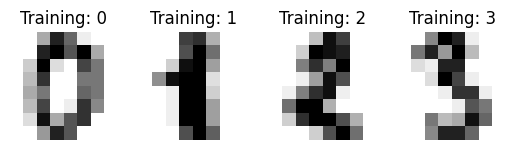

In [4206685394]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
from itertools import islice as islice_fabcecd2
pairs_fabcecd2 = zip(images_7d963ef2, target_7d963ef2)
for index_fabcecd2, (image_fabcecd2, label_fabcecd2) in enumerate(islice_fabcecd2(pairs_fabcecd2, 4)):
    plt_5fe45813.subplot(1, 4, index_fabcecd2 + 1)
    plt_5fe45813.axis('off')
    plt_5fe45813.imshow(image_fabcecd2, cmap=plt_5fe45813.cm.gray_r, interpolation='nearest')
    plt_5fe45813.title('Training: %i' % label_fabcecd2)
display_variables({ "islice_fabcecd2": islice_fabcecd2,})

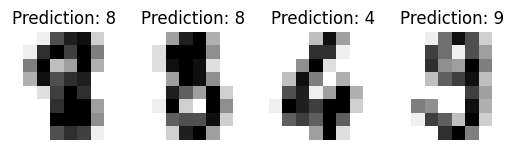

In [616985016]:
pairs_24c671b8 = zip(X_test_182d1eba, predicted_2f6380ce)
for index_24c671b8, (image_24c671b8, prediction_24c671b8) in enumerate(islice_fabcecd2(pairs_24c671b8, 4)):
    plt_5fe45813.subplot(1, 4, index_24c671b8 + 1)
    plt_5fe45813.axis('off')
    plt_5fe45813.imshow(image_24c671b8.reshape((8, 8)), cmap=plt_5fe45813.cm.gray_r, interpolation='nearest')
    plt_5fe45813.title('Prediction: %i' % prediction_24c671b8)

In [3212573332]:
# Confusion matrix
metrics_5fe45813.confusion_matrix(expected_2f6380ce, predicted_2f6380ce)

array([[87,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 88,  1,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 85,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 79,  0,  3,  0,  4,  5,  0],
       [ 0,  0,  0,  0, 88,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0, 88,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 90,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 88,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 88,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 90]], dtype=int64)